In [16]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [31]:
# import data on COVID cases in each country
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ["Date"]) # parse the data in column "Date" into datetime objects
print(df.head())
pd.set_option('display.max_columns', None)

# shape of the data
print(df.shape)

  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
(49068, 10)


In [18]:
# See the first date and the last date in the data
print(df.Date.unique()[0])
print(df.Date.unique()[-1])
print(len(df.Date.unique()))

2020-01-22T00:00:00.000000000
2020-07-27T00:00:00.000000000
188


In [32]:
# Extract Sweden's Data
df_Sweden = df[df["Country/Region"] == "Sweden"][["Date", "Confirmed", "Deaths", "Recovered", "Active"]]

# Extract France's Data, I set "Province/State" to null because I just want to see the data for Metropolitan France (not including the oversea territories)
df_France = df[(df["Country/Region"] == "France") & (df["Province/State"].isnull())][["Date", "Confirmed", "Deaths", "Recovered", "Active"]]

# Extract Europe Data
df_Europe = df[df["WHO Region"] == "Europe"][["Date", "Confirmed", "Deaths", "Recovered", "Active"]]
df_Europe = df_Europe.groupby("Date").sum()

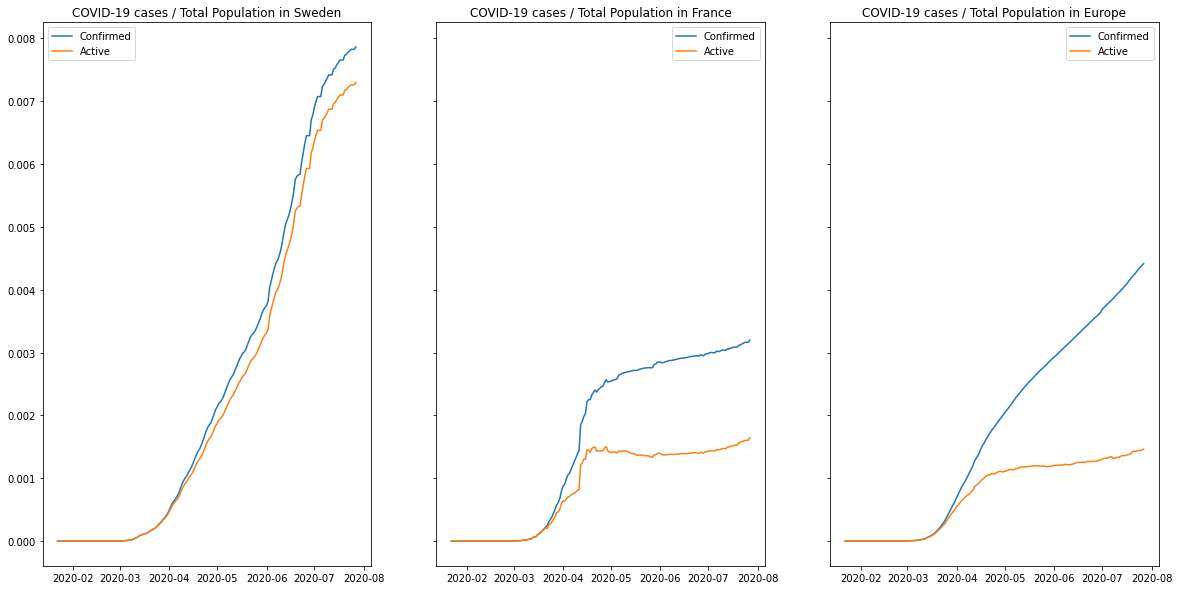

In [20]:
# Create subplots on confirmed and active cases
figure1, axes1 = plt.subplots(1, 3, figsize = (20, 10), sharey = True)

# Sweden
axes1[0].plot(df_Sweden["Date"], df_Sweden["Confirmed"]/10099265, label = "Confirmed")
axes1[0].plot(df_Sweden["Date"], df_Sweden["Active"]/10099265, label = "Active")
axes1[0].set_title("COVID-19 cases / Total Population in Sweden")
axes1[0].legend()

# France
axes1[1].plot(df_France["Date"], df_France["Confirmed"]/65273511, label = "Confirmed")
axes1[1].plot(df_France["Date"], df_France["Active"]/65273511, label = "Active")
axes1[1].set_title("COVID-19 cases / Total Population in France")
axes1[1].legend()

# Europe as a whole
axes1[2].plot(df_Europe.index, df_Europe["Confirmed"]/747636026, label = "Confirmed")
axes1[2].plot(df_Europe.index, df_Europe["Active"]/747636026, label = "Active")
axes1[2].set_title("COVID-19 cases / Total Population in Europe")
plt.legend()
# Population data cited from https://www.worldometers.info/world-population/population-by-country/
plt.show()

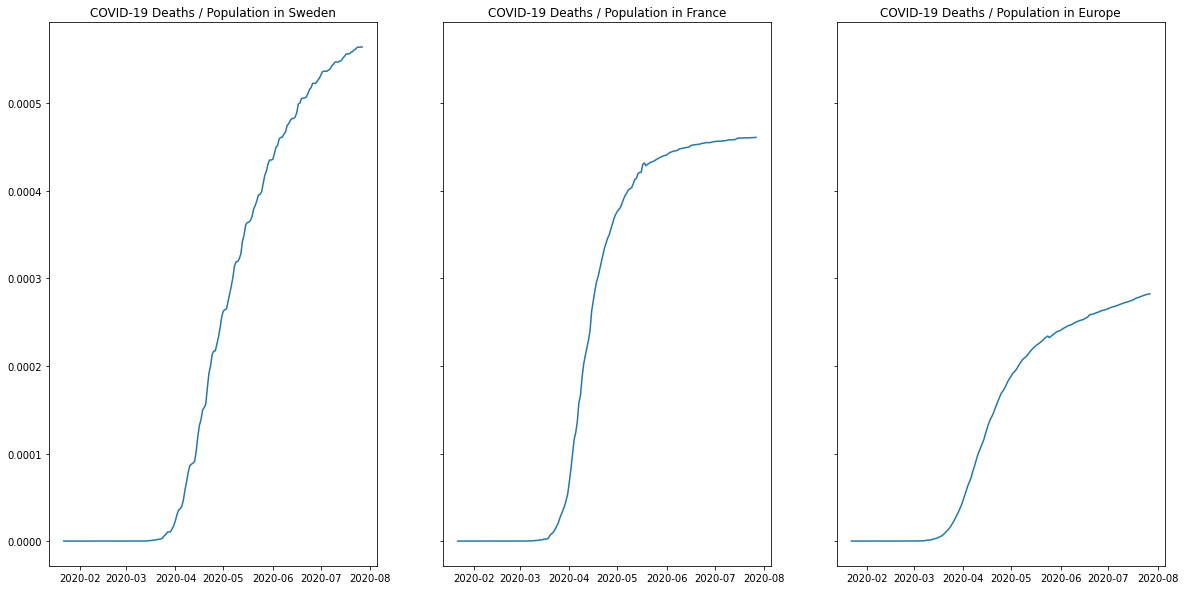

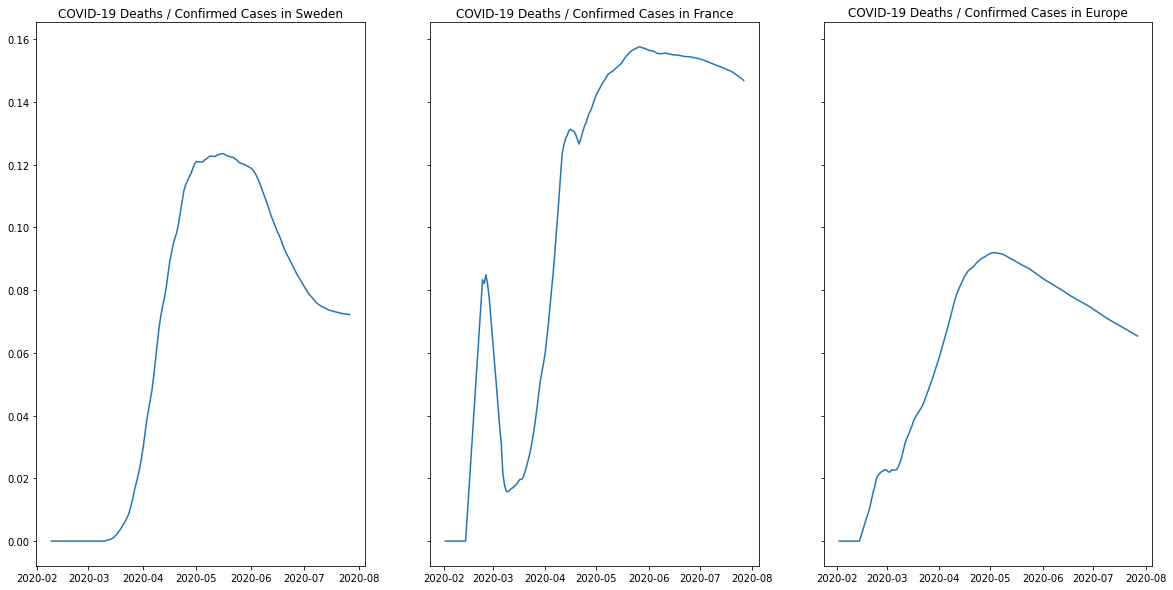

In [21]:
# Create subplots on deaths of COVID-19 cases
figure2, axes2 = plt.subplots(1, 3, figsize = (20, 10), sharey = True)

# Sweden
axes2[0].plot(df_Sweden["Date"], df_Sweden["Deaths"]/10099265)
axes2[0].set_title("COVID-19 Deaths / Population in Sweden")

# France
axes2[1].plot(df_France["Date"], df_France["Deaths"]/65273511)
axes2[1].set_title("COVID-19 Deaths / Population in France")

# Europe as a whole
axes2[2].plot(df_Europe.index, df_Europe["Deaths"]/747636026)
axes2[2].set_title("COVID-19 Deaths / Population in Europe")
# Population data cited from https://www.worldometers.info/world-population/population-by-country/
plt.show()

figure3, axes3 = plt.subplots(1, 3, figsize = (20, 10), sharey = True)
# Sweden
axes3[0].plot(df_Sweden["Date"], (df_Sweden["Deaths"]/df_Sweden["Confirmed"]).rolling(10).mean())
axes3[0].set_title("COVID-19 Deaths / Confirmed Cases in Sweden")

# France
axes3[1].plot(df_France["Date"], (df_France["Deaths"]/df_France["Confirmed"]).rolling(10).mean())
axes3[1].set_title("COVID-19 Deaths / Confirmed Cases in France")

# Europe as a whole
axes3[2].plot(df_Europe.index, (df_Europe["Deaths"]/df_Europe["Confirmed"]).rolling(10).mean())
axes3[2].set_title("COVID-19 Deaths / Confirmed Cases in Europe")
plt.show()

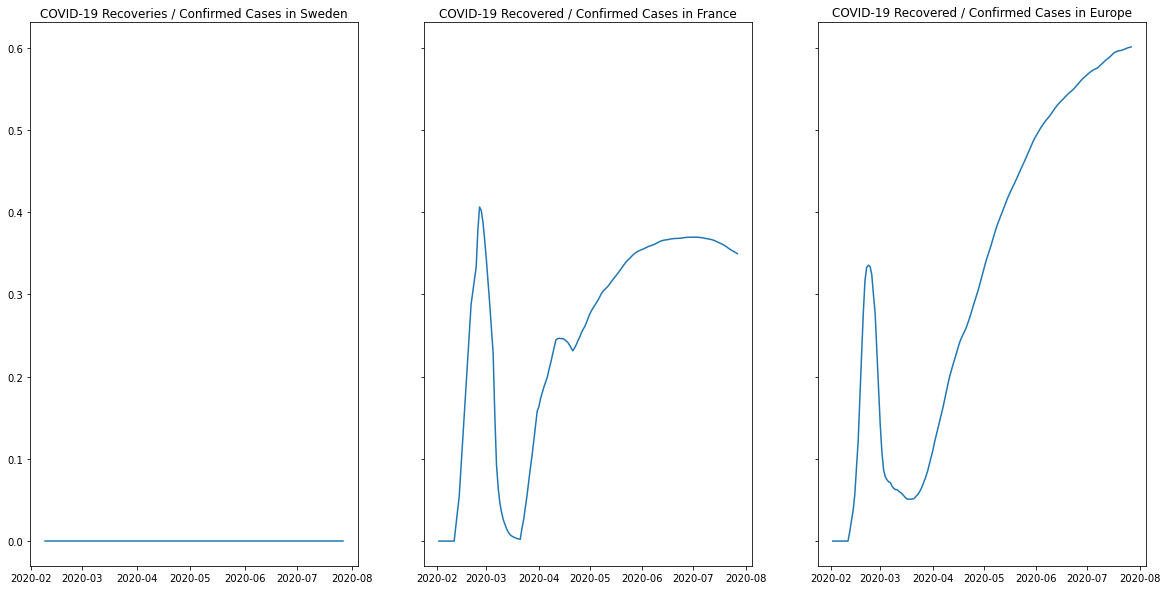

In [22]:
# Create subplots on recoveries from COVID-19 cases
figure4, axes4 = plt.subplots(1, 3, figsize = (20, 10), sharey = True)

# Sweden
axes4[0].plot(df_Sweden["Date"], (df_Sweden["Recovered"]/df_Sweden["Confirmed"]).rolling(10).mean())
axes4[0].set_title("COVID-19 Recoveries / Confirmed Cases in Sweden")

# France
axes4[1].plot(df_France["Date"], (df_France["Recovered"]/df_France["Confirmed"]).rolling(10).mean())
axes4[1].set_title("COVID-19 Recovered / Confirmed Cases in France")

# Europe as a whole
axes4[2].plot(df_Europe.index, (df_Europe["Recovered"]/df_Europe["Confirmed"]).rolling(10).mean())
axes4[2].set_title("COVID-19 Recovered / Confirmed Cases in Europe")
# Population data cited from https://www.worldometers.info/world-population/population-by-country/
plt.show()

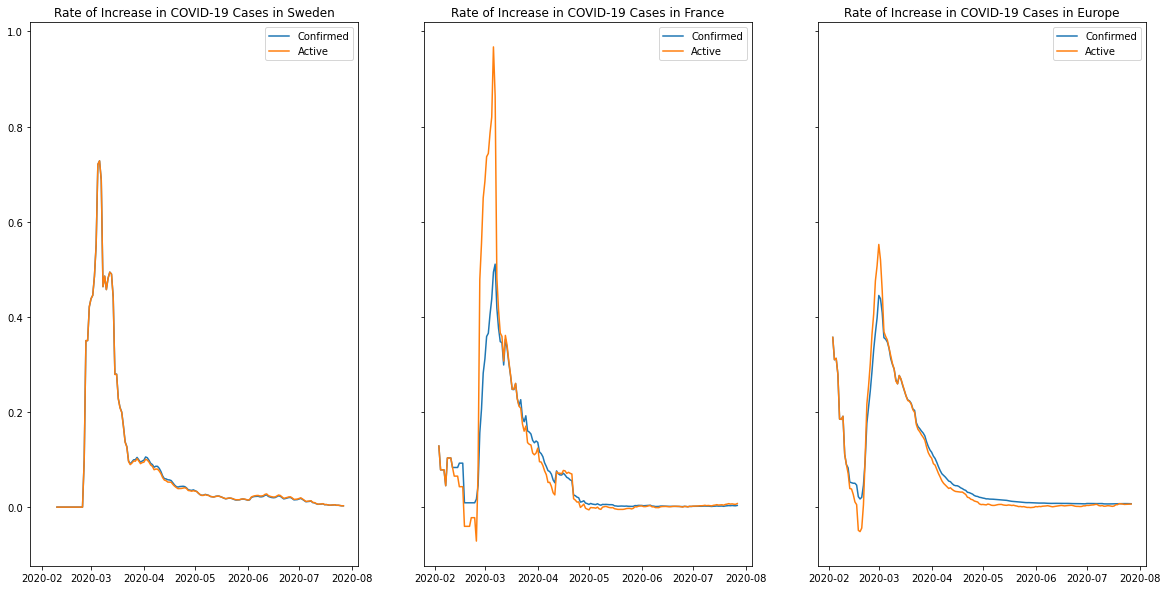

In [23]:
# Rate of increase in Confirmed and Active cases
figure5, axes5 = plt.subplots(1, 3, figsize = (20, 10), sharey = True, sharex = True)
# Sweden
Sweden_pct1 = df_Sweden["Confirmed"].pct_change()
Sweden_pct2 = df_Sweden["Active"].pct_change()
axes5[0].plot(df_Sweden["Date"], Sweden_pct1.rolling(10).mean(), label = "Confirmed")
axes5[0].plot(df_Sweden["Date"], Sweden_pct2.rolling(10).mean(), label = "Active")
axes5[0].set_title("Rate of Increase in COVID-19 Cases in Sweden")
axes5[0].legend()

# France
France_pct1 = df_France["Confirmed"].pct_change()
France_pct2 = df_France["Active"].pct_change()
axes5[1].plot(df_France["Date"], France_pct1.rolling(10).mean(), label = "Confirmed")
axes5[1].plot(df_France["Date"], France_pct2.rolling(10).mean(), label = "Active")
axes5[1].set_title("Rate of Increase in COVID-19 Cases in France")
axes5[1].legend()

# Europe as a whole
Europe_pct1 = df_Europe["Confirmed"].pct_change()
Sweden_pct2 = df_Europe["Active"].pct_change()
axes5[2].plot(df_Europe.index, Europe_pct1.rolling(10).mean(), label = "Confirmed")
axes5[2].plot(df_Europe.index, Sweden_pct2.rolling(10).mean(), label = "Active")
axes5[2].set_title("Rate of Increase in COVID-19 Cases in Europe")
axes5[2].legend()

In [24]:
# Analytis of the relationship between lockdown duration and COIVD-19 impact
# import data on each country's lockdown dates
df_lockdown = pd.read_csv("lockdown_dates.csv", parse_dates = ["Start date", "End date"])
print(df_lockdown.head())
pd.set_option('display.max_columns', None)

       Country         Place Start date   End date         Level  \
0        China     Xiangyang 2020-01-28 2020-03-25          City   
1  Philippines  Soccsksargen 2020-03-23 2020-04-30        Region   
2        China      Huangshi 2020-01-24 2020-03-13          City   
3   Montenegro          Tuzi 2020-03-24        NaT  Municipality   
4        China      Jingzhou 2020-01-24 2020-03-17          City   

                                                 url      update  Confirmed  
0  https://www.thepaper.cn/newsDetail_forward_567...  2020-02-04       True  
1  https://www.philstar.com/headlines/2020/03/12/...  2020-03-12      False  
2  https://news.sina.com.cn/c/2020-03-13/doc-iimx...  2020-03-14       True  
3  https://www.nst.com.my/news/nation/2020/03/575...  2020-03-16      False  
4          https://www.yicai.com/news/100550418.html  2020-03-16       True  


In [25]:
# data cleaning
country_lockdown = df_lockdown[["Country", "Start date", "End date"]]
country_lockdown.dropna(subset = ["End date"], inplace = True) # Drop data with no End date
country_lockdown["Lockdown duration"] = (country_lockdown["End date"] - country_lockdown["Start date"]).dt.days

# For simplicity, I only keep the longest days of lockdown in each country in my analysis
country_lockdown = country_lockdown.groupby("Country")["Lockdown duration"].max() # This creates a Series
print(country_lockdown.head())

Country
Albania      40
Algeria      34
Argentina    80
Armenia      41
Australia    53
Name: Lockdown duration, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# I create a dataframe that keeps the data on the last day recorded in df, which is 2020-07-27
df_lastday = df[df["Date"] == "2020-07-27"][["Country/Region", "Confirmed", "Deaths", "Recovered", "Active"]]
df_lastday = df_lastday.groupby("Country/Region").sum() # add the data of different regions of a country together

# I try to create data that keeps the median for the rates of increase in confirmed cases and active cases for each country over the period of time recorded in df
df_c = pd.DataFrame()
for d in df["Date"].unique():
  df_d = df[df["Date"] == d][["Country/Region", "Confirmed", "Deaths", "Recovered", "Active"]]
  df_d = df_d.groupby("Country/Region").sum()
  df_c = df_c.append(df_d)

for c in df_c.index.unique():
  df_new = df_c[df_c.index == c]
  df_lastday.loc[c, "Median PCT Confirmed"] = df_new["Confirmed"].pct_change().median()
  df_lastday.loc[c, "Median PCT Active"] = df_new["Active"].pct_change().median()

print(df_lastday.head())

                Confirmed  Deaths  Recovered  Active  Median PCT Confirmed  \
Country/Region                                                               
Afghanistan         36263    1269      25198    9796              0.040925   
Albania              4880     144       2745    1991              0.026250   
Algeria             27973    1163      18837    7973              0.028493   
Andorra               907      52        803      52              0.000000   
Angola                950      41        242     667              0.027386   

                Median PCT Active  
Country/Region                     
Afghanistan              0.032085  
Albania                  0.030284  
Algeria                  0.022919  
Andorra                  0.000000  
Angola                   0.022449  


In [27]:
# Add in data for population for each country. This is used for calculating confirmed cases / population for each country later
world_population = pd.read_csv("population_by_country_2020.csv")
world_population = world_population[["Country (or dependency)", "Population (2020)"]]
world_population.set_index("Country (or dependency)", inplace = True)
world_population.rename(columns = {"Population (2020)": "Population"}, inplace = True)
for c1 in df_lastday.index:
  for c2 in world_population.index:
    if c1 == c2:
      df_lastday.loc[c1, "Population"] = world_population.loc[c2, "Population"]
print(df_lastday.head())

                Confirmed  Deaths  Recovered  Active  Median PCT Confirmed  \
Country/Region                                                               
Afghanistan         36263    1269      25198    9796              0.040925   
Albania              4880     144       2745    1991              0.026250   
Algeria             27973    1163      18837    7973              0.028493   
Andorra               907      52        803      52              0.000000   
Angola                950      41        242     667              0.027386   

                Median PCT Active  Population  
Country/Region                                 
Afghanistan              0.032085  39074280.0  
Albania                  0.030284   2877239.0  
Algeria                  0.022919  43984569.0  
Andorra                  0.000000     77287.0  
Angola                   0.022449  33032075.0  


In [28]:
# Add in data for lockdown duration that I got earlier
for c1 in df_lastday.index:
  for c2 in country_lockdown.index:
    if c1 == c2:
      df_lastday.loc[c1, "Lockdown Duration"] = country_lockdown[c2]
print(df_lastday.head())

                Confirmed  Deaths  Recovered  Active  Median PCT Confirmed  \
Country/Region                                                               
Afghanistan         36263    1269      25198    9796              0.040925   
Albania              4880     144       2745    1991              0.026250   
Algeria             27973    1163      18837    7973              0.028493   
Andorra               907      52        803      52              0.000000   
Angola                950      41        242     667              0.027386   

                Median PCT Active  Population  Lockdown Duration  
Country/Region                                                    
Afghanistan              0.032085  39074280.0                NaN  
Albania                  0.030284   2877239.0               40.0  
Algeria                  0.022919  43984569.0               34.0  
Andorra                  0.000000     77287.0                NaN  
Angola                   0.022449  33032075.0      

In [33]:
# There are countries where no lockdown was implemented. I also add them to df_lastday with Lockdown Duration = 0
no_lockdown = ["Belarus", "Burundi", "Cambodia", "Malawi", "Tanzania", "Nicaragua", "South Korea", "Sweden", "Uruguay"]
# information from https://en.wikipedia.org/wiki/COVID-19_lockdowns#Countries_and_territories_without_lockdowns
for c1 in no_lockdown:
  for c2 in df_lastday.index:
    if c1 == c2:
      df_lastday.loc[c2, "Lockdown Duration"] = 0
print(df_lastday.head())
# Still there are missing data but it's good enough for my analysis for now

                Confirmed  Deaths  Recovered  Active  Median PCT Confirmed  \
Country/Region                                                               
Afghanistan         36263    1269      25198    9796              0.040925   
Albania              4880     144       2745    1991              0.026250   
Algeria             27973    1163      18837    7973              0.028493   
Andorra               907      52        803      52              0.000000   
Angola                950      41        242     667              0.027386   

                Median PCT Active  Population  Lockdown Duration  
Country/Region                                                    
Afghanistan              0.032085  39074280.0                NaN  
Albania                  0.030284   2877239.0               40.0  
Algeria                  0.022919  43984569.0               34.0  
Andorra                  0.000000     77287.0                NaN  
Angola                   0.022449  33032075.0      

In [30]:
df_lastday.to_csv('EDA analysis.csv', index = True, header = True)
# The rest of the analysis is conducted on the Tableau file